In [ ]:
import tensorflow as tf

In [2]:
"tf version:", tf.__version__
"tf run mode:", tf.executing_eagerly()
tf.config.list_physical_devices()
#tf.config.list_physical_devices("CPU")
#tf.config.list_physical_devices("GPU")
tf.test.is_gpu_available()
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
local_devices = device_lib.list_local_devices()
local_devices
# 使用 GPU 时，建议加入：
gpu_physical_devices = tf.config.experimental.list_physical_devices('GPU')
gpu_physical_devices
# 设置 gpu 的内存是增长型使用
tf.config.experimental.set_memory_growth(gpu_physical_devices[0], True)

('tf version:', '2.9.1')

('tf run mode:', True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

'/device:GPU:0'

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9742389359850503999
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4919132160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6603132053019617892
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 970M, pci bus id: 0000:01:00.0, compute capability: 5.2"
 xla_global_id: 416903419]

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# 查看张量的值
t0 = tf.constant([[1, 2], [3, 4]])  # list 的常量
t0 
t0.numpy()
type(t0)
type(t0.numpy())

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

array([[1, 2],
       [3, 4]])

tensorflow.python.framework.ops.EagerTensor

numpy.ndarray

In [4]:
# 01:基于 python list 列表创建张量
pl = [[1, 2], [3, 4]]
t1 = tf.constant(pl)
"t1:", t1
"t1 value:", t1.numpy()
"t1 type:", type(t1)
"t1 value type:", type(t1.numpy())

('t1:',
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>)

('t1 value:',
 array([[1, 2],
        [3, 4]]))

('t1 type:', tensorflow.python.framework.ops.EagerTensor)

('t1 value type:', numpy.ndarray)

In [5]:
# 02:基于 numpy.ndarray 数组创建张量
import numpy as np
# 整型数组
t2 = tf.constant(np.array([1, 2]))
"t2:", t2
"t2 value:", t2.numpy()
"t2 type:", type(t2)
"t2 value type:", type(t2.numpy())
# 浮点型数组 - 默认 float64
t2_2 = tf.constant(np.array([1., 2.0]))
"t2_2:", t2_2
"t2_2 value:", t2_2.numpy()
"t2_2 type:", type(t2_2)
"t2_2 value type:", type(t2_2.numpy())
# 浮点型数组 - 显示指定为 float32
t2_3 = tf.constant(np.array([1., 2.0]), dtype=tf.float32)
"t2_3:", t2_3
"t2_3 value:", t2_3.numpy()
"t2_3 type:", type(t2_3)
"t2_3 value type:", type(t2_3.numpy())

('t2:', <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>)

('t2 value:', array([1, 2]))

('t2 type:', tensorflow.python.framework.ops.EagerTensor)

('t2 value type:', numpy.ndarray)

('t2_2:', <tf.Tensor: shape=(2,), dtype=float64, numpy=array([1., 2.])>)

('t2_2 value:', array([1., 2.]))

('t2_2 type:', tensorflow.python.framework.ops.EagerTensor)

('t2_2 value type:', numpy.ndarray)

('t2_3:',
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>)

('t2_3 value:', array([1., 2.], dtype=float32))

('t2_3 type:', tensorflow.python.framework.ops.EagerTensor)

('t2_3 value type:', numpy.ndarray)

In [6]:
# 03:基于 数字（单一数值）创建张量
t3 = tf.constant(1)
"t3:", t3
"t3.numpy():", t3.numpy()
"t3 type:", type(t3)
"t3 value type", type(t3.numpy())
t3_2 = tf.constant(2.)
"t3_2:", t3_2
"t3_2.numpy():", t3_2.numpy()
"t3_2 type:", type(t3_2)
"t3_2 value type", type(t3_2.numpy())
# 显示指定元素类型
# 建议： 多个参数时，最好给出：参数的名称=参数值
#t3_3 = tf.constant(2., dtype=tf.float64)
t3_3 = tf.constant(value = 2., dtype=tf.float64)
t3_3

('t3:', <tf.Tensor: shape=(), dtype=int32, numpy=1>)

('t3.numpy():', 1)

('t3 type:', tensorflow.python.framework.ops.EagerTensor)

('t3 value type', numpy.int32)

('t3_2:', <tf.Tensor: shape=(), dtype=float32, numpy=2.0>)

('t3_2.numpy():', 2.0)

('t3_2 type:', tensorflow.python.framework.ops.EagerTensor)

('t3_2 value type', numpy.float32)

<tf.Tensor: shape=(), dtype=float64, numpy=2.0>

In [7]:
# 04:基于 布尔值 创建张量
t4 = tf.constant([True, False])
"t4:", t4
"t4.numpy():", t4.numpy()
"t4 type:", type(t4)
"t4 value type", type(t4.numpy())
# True => 1/1.  False => 0/0.
tf.cast(t4, tf.int32)
tf.cast(t4, tf.float32)
# 非0 => True  0 => False
tmp = tf.constant([-1, 0, 1, 2.0])
tf.cast(tmp, tf.bool)

('t4:', <tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>)

('t4.numpy():', array([ True, False]))

('t4 type:', tensorflow.python.framework.ops.EagerTensor)

('t4 value type', numpy.ndarray)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

In [8]:
# 05:基于 字符串 创建张量
t5 = tf.constant("hello")
"t5:", t5
# Python 字符（串）以 unicode 编码表达
# Tensorflow 字符（串） 以字节数组的形式表达
# numpy=b'hello'
"t5.numpy():", t5.numpy()
"t5 type:", type(t5)
# bytes  == 字节数组
"t5 value type", type(t5.numpy())
# unicode === ascii == utf8
# english -- ascii == 1byte
# 比如：中文字符-2个字节 == 2byte表示一个字符，
# 此时，需要3个字节表示需要两个字节表述的中文字符，
# utf8 中，规定：第1个字节 最高位111.。。 后2个字节表示实际的字符编码
# 在 tf 中 中文字符占 3 个字节
tf.constant("天下")

('t5:', <tf.Tensor: shape=(), dtype=string, numpy=b'hello'>)

('t5.numpy():', b'hello')

('t5 type:', tensorflow.python.framework.ops.EagerTensor)

('t5 value type', bytes)

<tf.Tensor: shape=(), dtype=string, numpy=b'\xe5\xa4\xa9\xe4\xb8\x8b'>

In [9]:
# 06:tf.convert_to_tensor()方法将现有数据转换为张量
import numpy as np
na = np.arange(12).reshape(3, 4)
na
type(na)
# 完成转换
ta = tf.convert_to_tensor(na)
"ta:", ta
"ta.numpy():", ta.numpy()
"ta type:", type(ta)
"ta value type", type(ta.numpy())
string_array = ["hello", "天下"]
t_strings = tf.constant(string_array)
t_strings.numpy()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

numpy.ndarray

('ta:',
 <tf.Tensor: shape=(3, 4), dtype=int32, numpy=
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])>)

('ta.numpy():',
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

('ta type:', tensorflow.python.framework.ops.EagerTensor)

('ta value type', numpy.ndarray)

array([b'hello', b'\xe5\xa4\xa9\xe4\xb8\x8b'], dtype=object)

In [10]:
# 07:各种特殊张量
# 全0张量
tf.zeros(shape=(6))
tf.zeros(shape=[2, 3])
# 全1张量
tf.ones(shape=(6))
tf.ones(shape=[2, 3])
# like 。。
tf.zeros_like(tf.ones(shape=[2, 3]))
# 同值张量
tf.fill([2, 3], 9)
tf.fill([2, 3], 9.)
tf.fill([2,], "hello")
tf.fill([], True)
# 正态分布
tf.random.normal([2, 3])
tf.random.normal(shape=[2, 3, 4], mean=0.0, stddev=2.0)
# 截断正态分布
tf.random.truncated_normal(shape=[2, 3, 4], mean=0.0, stddev=2.0)
# 均匀分布
tf.random.set_seed(42)  # 每次生成的随机数据一致
tf.random.uniform(shape=(3, 3), minval=1, maxval=10, dtype='int32')
tf.random.set_seed(42)  # 每次生成的随机数据一致
tf.random.uniform(shape=(3, 3), minval=1, maxval=10, dtype='int32')
# 没有起作用。
#tf.random.uniform(shape=(3, 3), minval=1, maxval=10, dtype='int32', seed=42)
#tf.random.uniform(shape=(3, 3), minval=1, maxval=10, dtype='int32', seed=42)
# 序列张量,前闭后开空间
tf.range(10)
tf.range(start=1, limit=10, delta=2)

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0.], dtype=float32)>

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1.], dtype=float32)>

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 9, 9],
       [9, 9, 9]])>

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[9., 9., 9.],
       [9., 9., 9.]], dtype=float32)>

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'hello', b'hello'], dtype=object)>

<tf.Tensor: shape=(), dtype=bool, numpy=True>

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.3258864 , -1.3374125 , -1.6455876 ],
       [ 0.4674322 , -1.0085659 , -0.49727106]], dtype=float32)>

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[-3.0900676 ,  0.06106665, -1.2160052 ,  3.9257355 ],
        [ 0.44119656,  3.898708  ,  0.4625773 , -1.0210679 ],
        [ 1.8632311 , -2.8251648 , -1.0558579 , -3.9115715 ]],

       [[-0.34709856,  1.4259995 ,  0.54207313, -0.9045479 ],
        [ 3.4186418 , -1.6602695 ,  3.3084226 ,  1.4107931 ],
        [ 0.507739  ,  1.5735748 , -0.255079  , -1.8297805 ]]],
      dtype=float32)>

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[ 1.9810729 ,  1.1371591 , -0.5367684 , -1.5745926 ],
        [-1.1894002 ,  0.61738336, -1.8490044 , -2.714796  ],
        [-0.855381  , -1.9755341 ,  3.5090632 ,  0.40457392]],

       [[-1.9589148 ,  0.31488922, -0.6768407 , -3.8647504 ],
        [-0.14740387,  3.41704   ,  0.8433062 ,  1.695899  ],
        [-0.07205007, -2.1923492 ,  2.2899547 , -0.191505  ]]],
      dtype=float32)>

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[8, 6, 9],
       [4, 8, 3],
       [8, 8, 8]])>

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[8, 6, 9],
       [4, 8, 3],
       [8, 8, 8]])>

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

In [11]:
tf.fill(dims=[2, 3], value=9)
# tf.constant(value=9, shape=[2,3])
tf.constant(shape=[2,3], value=9)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 9, 9],
       [9, 9, 9]])>

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 9, 9],
       [9, 9, 9]])>

In [12]:
# 关于变量
ct = tf.constant([-1, 0, 1, 2])
# 转换为变量类型
vt = tf.Variable(ct)
vt
vt.name, vt.trainable
v = tf.Variable(1.)
v.assign(2.)
v.assign_add(0.5)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([-1,  0,  1,  2])>

('Variable:0', True)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.0>

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.5>

In [4]:
# 获取张量的类型
t = tf.constant(3.1)
type(t)
tf.is_tensor(t)

tensorflow.python.framework.ops.EagerTensor

True

In [6]:
type(t.numpy())

numpy.float32

In [7]:
t =  tf.constant([[1,2], [3, 4]])
type(t)
t.numpy()
type(t.numpy())

tensorflow.python.framework.ops.EagerTensor

array([[1, 2],
       [3, 4]])

numpy.ndarray

In [16]:
import numpy as np
np.pi
# 默认会转换为 tf.float32 
t_pi_float32 = tf.constant(np.pi, dtype=tf.float32)
t_pi_float32
t_pi_float64 = tf.constant(np.pi, dtype=tf.float64)
t_pi_float64
# t_pi_float64.numpy().dtype
# dtypes(t_pi_float64)

3.141592653589793

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

NameError: name 'dtypes' is not defined

In [20]:
# 上溢
c = tf.constant(123456789, dtype=tf.int32)
c
type(c)
c.dtype
d = tf.cast(c, tf.int16)
d

<tf.Tensor: shape=(), dtype=int32, numpy=123456789>

tensorflow.python.framework.ops.EagerTensor

tf.int32

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [22]:
b = tf.constant([True, False])
tf.cast(b, tf.int32)
v = tf.constant([-1, 0, 1, 2.0])
tf.cast(v, tf.bool)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

In [23]:
x = tf.constant([[1, 2], [3, 4], [5, 6]])
x.ndim
x.shape
x.dtype

2

TensorShape([3, 2])

tf.int32

In [24]:
tf.size(x)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [25]:
tf.rank(x)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [26]:
tf.random.shuffle(x)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[5, 6],
       [1, 2],
       [3, 4]])>

In [27]:
tf.random.shuffle(v)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1.,  2., -1.,  0.], dtype=float32)>

In [28]:
image_rgb = tf.random.uniform([28, 28, 3], maxval=255, dtype=tf.int32)
image_rgb
image_rgbs = tf.random.uniform([10, 28, 28, 3], maxval=255, dtype=tf.int32)
image_rgbs

<tf.Tensor: shape=(28, 28, 3), dtype=int32, numpy=
array([[[ 69, 233, 142],
        [156, 114, 107],
        [181, 185,  87],
        ...,
        [ 62,  58, 135],
        [115,  66, 230],
        [170,  13,  64]],

       [[135, 109,   2],
        [ 35, 122,  55],
        [167, 228, 109],
        ...,
        [200, 185,  98],
        [ 36,  40, 158],
        [167,  35, 207]],

       [[209, 107,  63],
        [233, 165, 131],
        [215,  83, 183],
        ...,
        [ 52, 100, 160],
        [215,  55,  12],
        [  2, 172, 118]],

       ...,

       [[148,  33, 181],
        [  2, 146, 136],
        [ 43, 237, 147],
        ...,
        [115, 202,  90],
        [ 14,  50,   7],
        [221,  36,  39]],

       [[204,  43, 218],
        [ 76, 244,  94],
        [197, 198, 211],
        ...,
        [228, 143,  52],
        [145, 224, 156],
        [ 24, 235,  24]],

       [[229, 141, 151],
        [ 41, 174, 182],
        [183,  34, 237],
        ...,
        [ 99,  25,  30]

<tf.Tensor: shape=(10, 28, 28, 3), dtype=int32, numpy=
array([[[[  4, 156,  79],
         [ 73, 190,  26],
         [178,  82,  56],
         ...,
         [ 92, 175,  81],
         [174,   4, 196],
         [143,  93,  73]],

        [[ 64, 207, 130],
         [177,  39,  37],
         [186, 186, 148],
         ...,
         [244,  92, 192],
         [149, 119, 149],
         [ 28,  91,  69]],

        [[ 10, 231, 155],
         [189, 132, 116],
         [203, 186,  44],
         ...,
         [153, 156, 234],
         [ 35, 214,  56],
         [105, 120, 247]],

        ...,

        [[211,  78, 149],
         [228,   4, 161],
         [186, 148, 228],
         ...,
         [172, 153,  90],
         [ 30,  30,  85],
         [ 30, 116, 225]],

        [[ 65,  71,  52],
         [221, 143, 143],
         [160, 178, 144],
         ...,
         [168, 165, 161],
         [156,  97,  95],
         [ 22, 197, 116]],

        [[ 93, 132, 153],
         [199, 130,  95],
         [104, 155,

In [36]:
a = tf.range(24)
a
b = tf.reshape(a, [2, 3, 4])
b
c = tf.reshape(a, [3, 2, 4])
c
d = tf.reshape(a, (4, 6))
d
e = tf.reshape(a, (2, -1, 4))
e

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])>

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])>

<tf.Tensor: shape=(3, 2, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])>

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])>

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])>

In [42]:
t = tf.constant([1, 2, 3])
t.ndim, t.shape, t.numpy
t2 = tf.expand_dims(t, 0)
t2.ndim, t2.shape, t2.numpy()
t1 = tf.expand_dims(t, 1)
t1.ndim, t1.shape, t1.numpy()

(1,
 TensorShape([3]),
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>>)

(2, TensorShape([1, 3]), array([[1, 2, 3]]))

(2,
 TensorShape([3, 1]),
 array([[1],
        [2],
        [3]]))

In [43]:
a = tf.range(24)
b = tf.reshape(a, [2, 3, 4])
b.ndim, b.shape, b.numpy()
b0 = tf.expand_dims(b, 0)
"b0: ", b0.ndim, b0.shape, b0.numpy()
b1 = tf.expand_dims(b, 1)
"b1: ", b1.ndim, b1.shape, b1.numpy()
b2 = tf.expand_dims(b, 2)
"b2: ", b2.ndim, b2.shape, b2.numpy()
b3 = tf.expand_dims(b, 3)
"b3: ", b3.ndim, b3.shape, b3.numpy()

(3,
 TensorShape([2, 3, 4]),
 array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]))

('b0: ',
 4,
 TensorShape([1, 2, 3, 4]),
 array([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]]))

('b1: ',
 4,
 TensorShape([2, 1, 3, 4]),
 array([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]]],
 
 
        [[[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]]))

('b2: ',
 4,
 TensorShape([2, 3, 1, 4]),
 array([[[[ 0,  1,  2,  3]],
 
         [[ 4,  5,  6,  7]],
 
         [[ 8,  9, 10, 11]]],
 
 
        [[[12, 13, 14, 15]],
 
         [[16, 17, 18, 19]],
 
         [[20, 21, 22, 23]]]]))

('b3: ',
 4,
 TensorShape([2, 3, 4, 1]),
 array([[[[ 0],
          [ 1],
          [ 2],
          [ 3]],
 
         [[ 4],
          [ 5],
          [ 6],
          [ 7]],
 
         [[ 8],
          [ 9],
          [10],
          [11]]],
 
 
        [[[12],
          [13],
          [14],
          [15]],
 
         [[16],
          [17],
          [18],
          [19]],
 
         [[20],
          [21],
          [22],
          [23]]]]))

In [46]:
"b3: ", b3.ndim, b3.shape, b3.numpy()
# b31 = tf.squeeze(b3, 1)
b31 = tf.squeeze(b3)
"b31: ", b31.ndim, b31.shape, b31.numpy()

('b3: ',
 4,
 TensorShape([2, 3, 4, 1]),
 array([[[[ 0],
          [ 1],
          [ 2],
          [ 3]],
 
         [[ 4],
          [ 5],
          [ 6],
          [ 7]],
 
         [[ 8],
          [ 9],
          [10],
          [11]]],
 
 
        [[[12],
          [13],
          [14],
          [15]],
 
         [[16],
          [17],
          [18],
          [19]],
 
         [[20],
          [21],
          [22],
          [23]]]]))

('b31: ',
 3,
 TensorShape([2, 3, 4]),
 array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]))

In [53]:
image = tf.random.uniform([28, 28], maxval=255, dtype=tf.int32)
image_red_channel = tf.expand_dims(image, axis=2)
image_red_channel.ndim, image_red_channel.shape
image_green_channel = tf.expand_dims(image, axis=2)
image_green_channel.ndim, image_green_channel.shape
image_blue_channel = tf.expand_dims(image, axis=2)
image_blue_channel.ndim, image_blue_channel.shape
image_rgb = tf.concat([image_red_channel, image_green_channel, image_blue_channel], axis = 2)
# 将image_rgb一张图片放入样本集中？
image_rgb_set = tf.expand_dims(image_rgb, 0)
image_rgb_set.shape
image_rgb.ndim, image_rgb.shape
image_red, image_green, image_blue = tf.split(image_rgb, 3, axis=2)

(3, TensorShape([28, 28, 1]))

(3, TensorShape([28, 28, 1]))

(3, TensorShape([28, 28, 1]))

TensorShape([1, 28, 28, 3])

(3, TensorShape([28, 28, 3]))

In [56]:
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])
z1 = tf.stack((x, y), axis=0)
z1.ndim, z1.shape, z1.numpy()
z2 = tf.stack((x, y), axis=1)
z2.ndim, z2.shape, z2.numpy()

(2,
 TensorShape([2, 3]),
 array([[1, 2, 3],
        [4, 5, 6]]))

(2,
 TensorShape([3, 2]),
 array([[1, 4],
        [2, 5],
        [3, 6]]))

In [22]:
import tensorflow as tf
# 生成一维张量
tf_01 = tf.range(10)
tf_01
tf.random.set_seed(42)
tf_01_2 = tf.random.uniform([10,], maxval=6, dtype=tf.int32)
tf_01_2
# 一维拼接
tf_concat_01 = tf.concat([tf_01, tf_01_2], axis=0)
tf_concat_01
# tf_concat_02 = tf.concat([tf_01, tf_01_2], axis=1)
# tf_concat_02
tf_stack_01 = tf.stack([tf_01, tf_01_2], axis=0)
tf_stack_01
tf_stack_02 = tf.stack([tf_01, tf_01_2], axis=1)
tf_stack_02

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 5, 5, 0, 4, 2, 1, 1, 1, 3])>

<tf.Tensor: shape=(20,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 5, 5, 0, 4, 2, 1, 1, 1, 3])>

<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 5, 5, 0, 4, 2, 1, 1, 1, 3]])>

<tf.Tensor: shape=(10, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 5],
       [2, 5],
       [3, 0],
       [4, 4],
       [5, 2],
       [6, 1],
       [7, 1],
       [8, 1],
       [9, 3]])>

In [29]:
# 生成二维张量
tf_02 = tf.range(6)
tf_02 = tf.reshape(tf_02, [2, 3])
tf_02
tf.random.set_seed(42)
tf_022 = tf.random.uniform([2, 3], maxval=6, dtype=tf.int32)
tf_022
# 二维拼接
tf_concat_02_0 = tf.concat([tf_02, tf_022], axis=0)
tf_concat_02_0
tf_concat_02_1 = tf.concat([tf_02, tf_022], axis=1)
tf_concat_02_1
# 二维堆叠
tf_stack_02_0 = tf.stack([tf_02, tf_022], axis=0)
tf_stack_02_0
tf_stack_02_1 = tf.stack([tf_02, tf_022], axis=1)
tf_stack_02_1
tf_stack_02_2 = tf.stack([tf_02, tf_022], axis=2)
tf_stack_02_2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]])>

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 5, 5],
       [0, 4, 2]])>

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [1, 5, 5],
       [0, 4, 2]])>

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[0, 1, 2, 1, 5, 5],
       [3, 4, 5, 0, 4, 2]])>

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [3, 4, 5]],

       [[1, 5, 5],
        [0, 4, 2]]])>

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [1, 5, 5]],

       [[3, 4, 5],
        [0, 4, 2]]])>

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[0, 1],
        [1, 5],
        [2, 5]],

       [[3, 0],
        [4, 4],
        [5, 2]]])>

In [30]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
x
# 二维的维度变换，就是转置
y1 = tf.transpose(x)
y1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]])>

In [34]:
a = tf.range(24)
b = tf.reshape(a, [2, 3, 4])
b
c =  tf.transpose(b, (1, 0, 2))
c.ndim, c.shape
A = [ 0,  1,  2,  3]
B = [ 4,  5,  6,  7]
C = [ 8,  9, 10, 11]
D = [12, 13, 14, 15]
E = [16, 17, 18, 19]
F = [20, 21, 22, 23]
# b其实为：
# A B C
# D E F 
# tf.transpose(b, (1, 0, 2)) 可以理解为：
# A B C
# D E F 
# 的转置：
# A D
# B E
# E F 
c

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])>

(3, TensorShape([3, 2, 4]))

<tf.Tensor: shape=(3, 2, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])>

In [36]:
tf.random.set_seed(42)
images = tf.random.normal([2, 32, 32, 3])
images01 = tf.transpose(images, perm=[0, 3, 1, 2])
images01

images02 = tf.transpose(images, perm=[0, 2, 1, 3])
images02

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 0.3274685 , -1.4075519 , -0.5573232 , ...,  2.132039  ,
          -1.7318882 ,  1.3617845 ],
         [ 0.20548698, -1.5677974 , -0.91995203, ..., -1.0919495 ,
           0.29616535, -0.9492331 ],
         [ 1.6719126 , -2.240332  ,  0.16223948, ..., -0.8256792 ,
          -0.41037703, -0.25359246],
         ...,
         [ 1.9803859 ,  0.5069896 ,  0.8723801 , ...,  0.5175638 ,
          -0.77693254, -1.3585666 ],
         [ 2.3433836 , -0.25396854,  0.05088823, ..., -0.7909972 ,
          -0.9823196 ,  1.4209518 ],
         [-0.24083076,  1.8468701 ,  1.1562476 , ...,  1.2389925 ,
          -2.1679735 , -0.15449814]],

        [[-0.8426258 , -2.3880599 ,  0.539707  , ..., -0.4657018 ,
          -0.3602359 , -1.6211367 ],
         [ 0.3016586 , -0.12295283,  0.3147643 , ...,  0.5029912 ,
           1.6395571 ,  0.61432874],
         [ 1.4818641 , -2.258513  , -0.9517771 , ..., -0.936846  ,
           0.27255708,  0.293

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
         [ 0.20548698,  0.3016586 , -1.5635453 ],
         [ 1.6719126 ,  1.4818641 ,  0.4848062 ],
         ...,
         [ 1.9803859 , -0.4602716 ,  1.0977181 ],
         [ 2.3433836 ,  1.0094466 ,  0.4445687 ],
         [-0.24083076,  2.152405  , -0.45377782]],

        [[-1.4075519 , -2.3880599 , -1.0392479 ],
         [-1.5677974 , -0.12295283, -1.4037988 ],
         [-2.240332  , -2.258513  , -0.13173966],
         ...,
         [ 0.5069896 ,  1.2332487 , -1.395452  ],
         [-0.25396854, -0.09010947,  0.32033485],
         [ 1.8468701 , -0.03349946, -1.757632  ]],

        [[-0.5573232 ,  0.539707  ,  1.6994323 ],
         [-0.91995203,  0.3147643 ,  1.8619504 ],
         [ 0.16223948, -0.9517771 , -0.07069698],
         ...,
         [ 0.8723801 , -0.05264815,  2.4193103 ],
         [ 0.05088823, -0.7584397 ,  0.4779355 ],
         [ 1.1562476 , -0.22877324,  0.37823597]

In [38]:
# 索引相关
tf.random.set_seed(42)
# 10 张 28x28 灰度图片
images = tf.random.uniform([10, 28,28],maxval=255,dtype=tf.int32)
images.shape
# 获取第一张图片
images[0]
# 获取第一张图片第二行
images[0, 1]
# 获取第一张图片第一行第一列 灰度值
images[0, 0, 0]

TensorShape([10, 28, 28])

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[112,  59, 146, 126, 187,  89,  13,  43, 241, 141,  37,  85, 116,
        231,  90,  58, 109,  67,  49, 224, 141, 147,  22, 144,  64, 241,
        181, 205],
       [201,  35,  70,   7, 166, 233, 248, 235, 118,  85, 198, 233,  77,
        228, 251,  84, 177, 139, 207,  59, 204,  26, 186, 100, 165,  55,
        188, 117],
       [ 20, 129, 202,  16, 129,  48,  47,  81, 119, 214,   4, 245, 210,
         33, 101, 189, 187, 221,  93, 103,  81,   9, 236,  31,  78,  88,
        142, 217],
       [252, 202, 186, 176, 189, 236,  90,   9, 220,   8,  22, 170, 230,
         31, 217, 174, 234, 155,  43, 145, 229,  87, 117, 188,  91,  19,
        118, 199],
       [248,  58, 108, 214,  90, 235, 118,  82,  54, 121, 128, 147, 116,
         62, 200,  60, 229,  83,  34, 244,  84, 190, 107,  40,  77,  39,
         14, 178],
       [  7, 132, 231, 236, 120, 112, 177, 229,  29,  82, 213, 246,  83,
        108, 128,  97, 136,  19, 187,  58, 114, 246, 1

<tf.Tensor: shape=(28,), dtype=int32, numpy=
array([201,  35,  70,   7, 166, 233, 248, 235, 118,  85, 198, 233,  77,
       228, 251,  84, 177, 139, 207,  59, 204,  26, 186, 100, 165,  55,
       188, 117])>

<tf.Tensor: shape=(), dtype=int32, numpy=112>

In [53]:
# 切片相关
tf.random.set_seed(42)
# 一维张量切片
tf01 = tf.range(10)
# tf01
# tf01[0:10:1]
# tf01[::]
tf01[:]
tf01[0::2]
tf01[1::2]
tf01[8:3:-2]
tf01[::-1]   # 逆序输出
# 二维张量切片
iris_features = tf.random.uniform([150, 4],maxval=10,dtype=tf.float32)
iris_labels = tf.random.uniform([150, 1],maxval=3,dtype=tf.int32)
# 转换类型，以便完成拼接
iris_labels = tf.cast(iris_labels, dtype=tf.float32)
iris_features.ndim, iris_features.shape
iris_labels.ndim, iris_labels.shape
tf_iris = tf.concat([iris_features, iris_labels], axis=1)
tf_iris.shape
# 第一个样本的所有属性(特征、标签)
tf_iris[0, :]
# 获取所有的特征组成的样本集的特征矩阵
tf_iris[:, :4:]
# 只是获取所有的标签
tf_iris[:, -1]
# 三维张量切片
# 索引相关
tf.random.set_seed(42)
# 10 张 28x28 灰度图片
images = tf.random.uniform([10, 28,28],maxval=255,dtype=tf.int32)
# 第1张图片
images[0]
images[0, :, :]
# 前5张图片
images[:5]
images[:5, :, :]
# 前5张图片隔行采样
images[:5, ::2, :]
images[:5, ::2, ::2]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([8, 6, 4])>

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])>

(2, TensorShape([150, 4]))

(2, TensorShape([150, 1]))

TensorShape([150, 5])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.6456213, 4.4100676, 3.528825 , 4.6448255, 2.       ],
      dtype=float32)>

<tf.Tensor: shape=(150, 4), dtype=float32, numpy=
array([[6.6456213e+00, 4.4100676e+00, 3.5288250e+00, 4.6448255e+00],
       [3.3660412e-01, 6.8467236e+00, 7.4011745e+00, 8.7244453e+00],
       [2.2632635e+00, 2.2319686e+00, 3.1038809e+00, 7.2233582e+00],
       [1.3318717e+00, 5.4806385e+00, 5.7460880e+00, 8.9968348e+00],
       [9.4636679e-02, 5.2123070e+00, 6.3454447e+00, 1.9932830e+00],
       [7.2942247e+00, 5.4583454e+00, 1.0756552e+00, 6.7670608e+00],
       [6.6027632e+00, 3.3695042e+00, 6.0141764e+00, 2.1062577e+00],
       [8.5273724e+00, 4.4062176e+00, 9.4852753e+00, 2.3752594e+00],
       [8.1179295e+00, 5.2633944e+00, 4.9430799e+00, 2.1612847e+00],
       [8.4571972e+00, 8.7188416e+00, 3.0838621e+00, 6.8680382e+00],
       [2.3764038e+00, 7.8172278e+00, 9.6713839e+00, 6.8701625e-01],
       [7.9873943e+00, 6.6028714e+00, 5.8715129e+00, 1.6461694e+00],
       [7.3810234e+00, 3.2054043e+00, 6.0738993e+00, 4.6523476e+00],
       [9.7803545e+00, 7.2231445e+00, 3.2347047e+00, 

<tf.Tensor: shape=(150,), dtype=float32, numpy=
array([2., 1., 2., 0., 1., 0., 1., 2., 2., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 2., 1., 2., 1., 0., 1., 0., 2., 1., 2., 0., 2., 1., 2., 2.,
       2., 1., 1., 1., 2., 2., 1., 2., 0., 2., 0., 1., 0., 1., 1., 0., 0.,
       2., 1., 0., 1., 1., 2., 0., 2., 1., 2., 0., 0., 2., 1., 0., 1., 2.,
       2., 1., 0., 2., 1., 2., 1., 2., 0., 2., 1., 0., 2., 0., 2., 2., 1.,
       1., 0., 0., 1., 2., 0., 2., 2., 2., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 2., 2., 1., 2., 1., 0., 2., 0., 1., 1., 0., 1., 1., 2., 1.,
       0., 2., 1., 1., 2., 0., 0., 2., 0., 1., 0., 0., 1., 2., 1., 0., 0.,
       1., 0., 2., 2., 2., 0., 0., 2., 0., 1., 0., 0., 0., 0.],
      dtype=float32)>

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[112,  59, 146, 126, 187,  89,  13,  43, 241, 141,  37,  85, 116,
        231,  90,  58, 109,  67,  49, 224, 141, 147,  22, 144,  64, 241,
        181, 205],
       [201,  35,  70,   7, 166, 233, 248, 235, 118,  85, 198, 233,  77,
        228, 251,  84, 177, 139, 207,  59, 204,  26, 186, 100, 165,  55,
        188, 117],
       [ 20, 129, 202,  16, 129,  48,  47,  81, 119, 214,   4, 245, 210,
         33, 101, 189, 187, 221,  93, 103,  81,   9, 236,  31,  78,  88,
        142, 217],
       [252, 202, 186, 176, 189, 236,  90,   9, 220,   8,  22, 170, 230,
         31, 217, 174, 234, 155,  43, 145, 229,  87, 117, 188,  91,  19,
        118, 199],
       [248,  58, 108, 214,  90, 235, 118,  82,  54, 121, 128, 147, 116,
         62, 200,  60, 229,  83,  34, 244,  84, 190, 107,  40,  77,  39,
         14, 178],
       [  7, 132, 231, 236, 120, 112, 177, 229,  29,  82, 213, 246,  83,
        108, 128,  97, 136,  19, 187,  58, 114, 246, 1

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[112,  59, 146, 126, 187,  89,  13,  43, 241, 141,  37,  85, 116,
        231,  90,  58, 109,  67,  49, 224, 141, 147,  22, 144,  64, 241,
        181, 205],
       [201,  35,  70,   7, 166, 233, 248, 235, 118,  85, 198, 233,  77,
        228, 251,  84, 177, 139, 207,  59, 204,  26, 186, 100, 165,  55,
        188, 117],
       [ 20, 129, 202,  16, 129,  48,  47,  81, 119, 214,   4, 245, 210,
         33, 101, 189, 187, 221,  93, 103,  81,   9, 236,  31,  78,  88,
        142, 217],
       [252, 202, 186, 176, 189, 236,  90,   9, 220,   8,  22, 170, 230,
         31, 217, 174, 234, 155,  43, 145, 229,  87, 117, 188,  91,  19,
        118, 199],
       [248,  58, 108, 214,  90, 235, 118,  82,  54, 121, 128, 147, 116,
         62, 200,  60, 229,  83,  34, 244,  84, 190, 107,  40,  77,  39,
         14, 178],
       [  7, 132, 231, 236, 120, 112, 177, 229,  29,  82, 213, 246,  83,
        108, 128,  97, 136,  19, 187,  58, 114, 246, 1

<tf.Tensor: shape=(5, 28, 28), dtype=int32, numpy=
array([[[112,  59, 146, ..., 241, 181, 205],
        [201,  35,  70, ...,  55, 188, 117],
        [ 20, 129, 202, ...,  88, 142, 217],
        ...,
        [ 69, 200,  77, ...,  78,  38, 232],
        [251, 202, 174, ...,  99,  82,  49],
        [156, 153, 207, ...,  74, 100, 216]],

       [[ 55, 237,  34, ..., 189,  80,  21],
        [126, 137, 158, ..., 246, 124, 150],
        [128, 216, 124, ...,  33, 202, 155],
        ...,
        [111,   9, 111, ..., 239,  40, 104],
        [135, 110,  15, ..., 101, 211, 150],
        [176,  72, 158, ...,  45,   6,  76]],

       [[ 14,  64, 123, ...,  86, 146, 166],
        [ 27, 153, 132, ...,  71,  22, 121],
        [163,  73, 191, ..., 197,  94,   0],
        ...,
        [ 99, 207,  43, ..., 217,  24, 146],
        [159,   1,  20, ..., 186, 215, 217],
        [111,  51,  21, ...,  75,  37, 125]],

       [[ 85,  23, 115, ..., 198,  52,  51],
        [ 29, 194,  63, ..., 135, 147,  24],
    

<tf.Tensor: shape=(5, 28, 28), dtype=int32, numpy=
array([[[112,  59, 146, ..., 241, 181, 205],
        [201,  35,  70, ...,  55, 188, 117],
        [ 20, 129, 202, ...,  88, 142, 217],
        ...,
        [ 69, 200,  77, ...,  78,  38, 232],
        [251, 202, 174, ...,  99,  82,  49],
        [156, 153, 207, ...,  74, 100, 216]],

       [[ 55, 237,  34, ..., 189,  80,  21],
        [126, 137, 158, ..., 246, 124, 150],
        [128, 216, 124, ...,  33, 202, 155],
        ...,
        [111,   9, 111, ..., 239,  40, 104],
        [135, 110,  15, ..., 101, 211, 150],
        [176,  72, 158, ...,  45,   6,  76]],

       [[ 14,  64, 123, ...,  86, 146, 166],
        [ 27, 153, 132, ...,  71,  22, 121],
        [163,  73, 191, ..., 197,  94,   0],
        ...,
        [ 99, 207,  43, ..., 217,  24, 146],
        [159,   1,  20, ..., 186, 215, 217],
        [111,  51,  21, ...,  75,  37, 125]],

       [[ 85,  23, 115, ..., 198,  52,  51],
        [ 29, 194,  63, ..., 135, 147,  24],
    

<tf.Tensor: shape=(5, 14, 28), dtype=int32, numpy=
array([[[112,  59, 146, ..., 241, 181, 205],
        [ 20, 129, 202, ...,  88, 142, 217],
        [248,  58, 108, ...,  39,  14, 178],
        ...,
        [156, 175, 102, ..., 179, 224,  49],
        [ 82, 157,  91, ...,  61,  83, 112],
        [251, 202, 174, ...,  99,  82,  49]],

       [[ 55, 237,  34, ..., 189,  80,  21],
        [128, 216, 124, ...,  33, 202, 155],
        [144, 109, 141, ..., 132, 185,  99],
        ...,
        [158, 107, 131, ...,  95, 160, 111],
        [100, 196,  61, ...,  63, 106, 209],
        [135, 110,  15, ..., 101, 211, 150]],

       [[ 14,  64, 123, ...,  86, 146, 166],
        [163,  73, 191, ..., 197,  94,   0],
        [ 41, 175, 247, ...,   2, 172, 184],
        ...,
        [  9, 117, 178, ..., 197, 137, 228],
        [124, 113, 203, ...,  29, 237,  85],
        [159,   1,  20, ..., 186, 215, 217]],

       [[ 85,  23, 115, ..., 198,  52,  51],
        [ 26,  26,  64, ...,  79, 195, 101],
    

<tf.Tensor: shape=(5, 14, 14), dtype=int32, numpy=
array([[[112, 146, 187,  13, 241,  37, 116,  90, 109,  49, 141,  22,
          64, 181],
        [ 20, 202, 129,  47, 119,   4, 210, 101, 187,  93,  81, 236,
          78, 142],
        [248, 108,  90, 118,  54, 128, 116, 200, 229,  34,  84, 107,
          77,  14],
        [250, 100, 195, 104,  69, 135, 165, 252, 198,  47, 143, 237,
         130, 229],
        [225, 116, 130, 174, 165, 130,  47, 176,  49, 221,  15, 103,
          95, 153],
        [ 14,  88,   8,  52, 130,  56, 197, 189, 182,  41, 175, 214,
         112, 218],
        [138,  64,  49, 100,  39, 164, 112, 175,  80, 132,  45, 121,
         155,  33],
        [167, 130,  13, 250, 242, 106,   7, 229,  74, 124, 129, 133,
         106,  68],
        [  1, 140, 139, 220, 111, 185, 179,   6, 202,  85, 146, 129,
          71,  72],
        [125, 241, 112, 229, 158, 176, 115, 133,  77, 239,  54, 192,
         155,  86],
        [100, 207,  18, 162,  63, 221, 212, 162,  74,  70, 

In [61]:
# lenna 图片例子
from PIL import Image
import numpy as np
lenna_png_numpy = np.array(Image.open('./datasets/lennas/Lenna.png'))
lenna_png_numpy.shape
tf_lenna_01 = tf.constant(lenna_png_numpy)
tf_lenna_01
tf_lenna_02 = tf.convert_to_tensor(lenna_png_numpy)
tf_lenna_02
tf_lenna = tf_lenna_02
# 获取该图片的红色通道
tf_lenna[:, :, 0]
# 获取该图片的蓝色通道
tf_lenna[:, :, -1]

# 读入所有的图片，形成样本集
lenna_png_numpy_01 = np.array(Image.open('./datasets/lennas/Lenna.png'))
lenna_png_numpy_02 = np.array(Image.open('datasets/lennas/Lenna.png'))
lennas_np = np.stack((lenna_png_numpy_01, lenna_png_numpy_02), axis=0)
tf_lennas = tf.convert_to_tensor(lennas_np)
tf_lennas.shape

(512, 512, 3)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  7

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  7

<tf.Tensor: shape=(512, 512), dtype=uint8, numpy=
array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)>

<tf.Tensor: shape=(512, 512), dtype=uint8, numpy=
array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8)>

TensorShape([2, 512, 512, 3])

In [73]:
# 提取相关
tf_a = tf.range(20)
tf_b = tf.reshape(tf_a, [4, 5])
# 一维张量的 一个维度 的采样
tf_gather = tf.gather(tf_a, [0, 2, 3])
tf_gather
tf_b
# 二维张量的 一个维度 的采样
tf_rows = tf.gather(tf_b, axis=0, indices=[0, 2, 3])
tf_rows
tf_cols = tf.gather(tf_b, axis=1, indices=[0, 2, 3])
tf_cols

# 一维张量，不连续多个位置的采样
tf_gathernd = tf.gather_nd(tf_a, [[0], [2], [3]])
tf_gathernd
# 二维张量，不连续多个位置的采样
tf_r_c =  tf.gather_nd(tf_b, [[0, 0], [2, 2], [3, 3]])
tf_r_c
image_rgb = tf.random.uniform([512, 512, 3], maxval=256, dtype=tf.int32)
# 获取指定位置的三个点的全部通道(RGB)数值
tf_pixels = tf.gather_nd(image_rgb, [[0, 0], [1, 2], [2, 3]])
tf_pixels
tf_pixels_channel = tf.gather_nd(image_rgb, [[0, 0, 0], [1, 2, 0], [2, 3, 0]])
tf_pixels_channel
images = tf.random.uniform([10, 28, 28], maxval=256, dtype=tf.int32)
some_images = tf.gather_nd(images, [[0], [2], [3]])
some_images

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 2, 3])>

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 0,  2,  3],
       [ 5,  7,  8],
       [10, 12, 13],
       [15, 17, 18]])>

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 2, 3])>

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 0, 12, 18])>

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[210, 103, 211],
       [ 38,  51,   5],
       [222, 245, 247]])>

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([210,  38, 222])>

<tf.Tensor: shape=(3, 28, 28), dtype=int32, numpy=
array([[[ 36,  52, 169, ..., 230,  59,  15],
        [227,  50, 128, ...,  80,   6,  34],
        [ 73, 186, 120, ..., 247, 166, 143],
        ...,
        [ 15, 232, 119, ..., 116, 107,  18],
        [ 13, 244, 113, ...,  93, 123, 117],
        [140, 126, 106, ...,  92, 146, 202]],

       [[ 94,  45, 125, ..., 175, 237, 116],
        [248,  92,  31, ..., 156,  43,   9],
        [189,  32, 246, ..., 161, 122,  60],
        ...,
        [214,   4, 206, ...,  34,   2, 108],
        [ 51,  82, 143, ...,  36, 131,  64],
        [ 44,  76, 112, ...,  70, 237, 159]],

       [[ 10, 181,  36, ..., 146,   1, 132],
        [132,  71,  23, ..., 237, 140, 146],
        [223, 205, 179, ..., 150, 245, 237],
        ...,
        [133, 121,  83, ..., 238, 211,  23],
        [193,  80, 240, ..., 137, 224, 104],
        [ 68,  16, 191, ...,  57, 137, 203]]])>

((512, 512), 'RGB', 'PNG')

(0.0, 1.0, 0.0, 1.0)

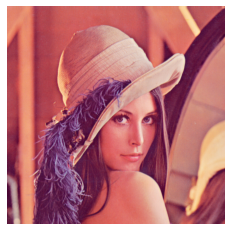

(numpy.ndarray, (512, 512, 3), True)

dtype('float32')

(numpy.ndarray, (512, 512, 3), False)

dtype('uint8')

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[226., 137., 125.],
        [226., 137., 125.],
        [223., 137., 133.],
        ...,
        [230., 148., 122.],
        [221., 130., 110.],
        [200.,  99.,  90.]],

       [[226., 137., 125.],
        [226., 137., 125.],
        [223., 137., 133.],
        ...,
        [230., 148., 122.],
        [221., 130., 110.],
        [200.,  99.,  90.]],

       [[226., 137., 125.],
        [226., 137., 125.],
        [223., 137., 133.],
        ...,
        [230., 148., 122.],
        [221., 130., 110.],
        [200.,  99.,  90.]],

       ...,

       [[ 84.,  18.,  60.],
        [ 84.,  18.,  60.],
        [ 92.,  27.,  58.],
        ...,
        [173.,  73.,  84.],
        [172.,  68.,  76.],
        [177.,  62.,  79.]],

       [[ 82.,  22.,  57.],
        [ 82.,  22.,  57.],
        [ 96.,  32.,  62.],
        ...,
        [179.,  70.,  79.],
        [181.,  71.,  81.],
        [185.,  74.,  81.]],

       [[ 82.,  2

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[226., 137., 125.],
        [226., 137., 125.],
        [223., 137., 133.],
        ...,
        [230., 148., 122.],
        [221., 130., 110.],
        [200.,  99.,  90.]],

       [[226., 137., 125.],
        [226., 137., 125.],
        [223., 137., 133.],
        ...,
        [230., 148., 122.],
        [221., 130., 110.],
        [200.,  99.,  90.]],

       [[226., 137., 125.],
        [226., 137., 125.],
        [223., 137., 133.],
        ...,
        [230., 148., 122.],
        [221., 130., 110.],
        [200.,  99.,  90.]],

       ...,

       [[ 84.,  18.,  60.],
        [ 84.,  18.,  60.],
        [ 92.,  27.,  58.],
        ...,
        [173.,  73.,  84.],
        [172.,  68.,  76.],
        [177.,  62.,  79.]],

       [[ 82.,  22.,  57.],
        [ 82.,  22.,  57.],
        [ 96.,  32.,  62.],
        ...,
        [179.,  70.,  79.],
        [181.,  71.,  81.],
        [185.,  74.,  81.]],

       [[ 82.,  2

In [87]:
# 导入 PIL 
from PIL import Image
import numpy as np

# 1. 指定图片文件信息（路径、名称）
image_file = './datasets/lennas/lenna.png'
# 2. 使用 PIL 加载指定的图片文件
image = Image.open(image_file)
# 3. 数据探查 - 查看属性
image.size, image.mode, image.format
# 4. 显示图片
# 使用 PIL 内置的方法，在当前OS的默认图片查看程序中打开要查看图片的临时图片
# image.show()
# 使用 matplotlib 显示图片
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(image)
plt.show()
# 5. 保存图片
# image.save('lenna.jpg')
# 6. 转换图片为 numpy ndarray
# 使用 np.array
# image_np_writable = np.array(image)
image_np_writable = np.array(image, np.float32)
type(image_np_writable), image_np_writable.shape, image_np_writable.flags.writeable
image_np_writable.dtype
# 使用 np.asarray
image_np_reanonly = np.asarray(image)
type(image_np_reanonly), image_np_reanonly.shape, image_np_reanonly.flags.writeable
image_np_reanonly.dtype
tf_image_01 = tf.convert_to_tensor(image_np_writable)
tf_image_01
tf_image_02 = tf.convert_to_tensor(image_np_reanonly, dtype=tf.float32)
tf_image_02
# 扩充：
# 遍历指定目录下的所有图片，读入到numpy，转为为 tensor，stack成样本集tensor

In [88]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228813984/228813984 [==============================] - 75s 0us/step
C:\Users\txsli\.keras\datasets\flower_photos


In [92]:
# 读入有表头、类别是文字的 csv
# 借助 pandas 
import pandas as pd
# 0. 指定 csv 文件的位置信息（目录、文件名）
iris_csv = 'datasets/iris/iris.csv'
# 1. 加载csv数据到 dataframe
iris_df = pd.read_csv(iris_csv)
type(iris_df)
iris_df
# 1-2. 完成文字形式的类别的数值化
df_iris = iris_df.replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df_iris
# 转换 dataframe 为 numpy ndarray
# iris_np = iris_df.values
# iris_np = df_iris.values
iris_np = np.array(df_iris)
type(iris_np)
iris_np
tf_iris = tf.convert_to_tensor(iris_np, dtype=tf.float32)
tf_iris

pandas.core.frame.DataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


numpy.ndarray

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

<tf.Tensor: shape=(150, 5), dtype=float32, numpy=
array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ]

In [94]:
# 读入没有表头，类别是文字的 csv
# 借助 pandas 
import pandas as pd
# 0. 指定 csv 文件的位置信息（目录、文件名）
iris_csv = 'datasets/iris/iris.data'
# 1. 加载csv数据到 dataframe
iris_df = pd.read_csv(iris_csv, header=None)
type(iris_df)
iris_df
# 替换类别文字为数值型数据
df_iris = iris_df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])
df_iris
# 后续操作同前

pandas.core.frame.DataFrame

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [97]:
# 极简 dataset 
data = np.array([[1,2],[3,4]])
tf_data = tf.convert_to_tensor(data)
# 基于tensor 、 numpy 生成 dataset 
# dataset_tensor = tf.data.Dataset.from_tensor_slices(tf_data)
dataset_np = tf.data.Dataset.from_tensor_slices(data)
# dataset_tensor
# dataset_np.ndim, dataset_np.shape
for sample in dataset_np:
    sample

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4])>

In [99]:
features = tf.constant([[1, 1], [2, 2], [3, 3]])
labels = tf.constant(['A', 'B', 'A'])
dataset01 = tf.data.Dataset.from_tensor_slices((features, labels))
# dataset01.ndim
for feature, label in dataset01:
    feature, label
for sample in dataset01:
    sample

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1])>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'B'>)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3])>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 1])>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'B'>)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3])>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'A'>)

In [102]:
dataset02 = tf.data.Dataset.from_tensors((features, labels))
for sample in dataset02:
    sample

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 1],
        [2, 2],
        [3, 3]])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'A', b'B', b'A'], dtype=object)>)